In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [3]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_C_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,1.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,7.0
2,2.0,2.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,NaN,3.0,2.0,0.0,7.0
3,2.0,2.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,...,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,7.0
4,2.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,3.0,0.0,2.0,2.0,2.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,70.0
354,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70.0
355,2.0,NaN,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,70.0
356,2.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70.0


In [4]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1
float64		column 2	5
float64		column 3	1
float64		column 4	5
float64		column 5	6
float64		column 6	1
float64		column 7	2
float64		column 8	1
float64		column 9	4
float64		column 10	4
float64		column 11	3
float64		column 12	3
float64		column 13	1
float64		column 14	2
float64		column 15	7
float64		column 16	3
float64		column 17	2
float64		column 18	4
float64		column 19	2
float64		column 20	4
float64		column 21	5
float64		column 22	1
float64		column 23	5
float64		column 24	4
float64		column 25	3
float64		column 26	2
float64		column 27	6
float64		column 28	3
float64		column 29	2
float64		column 30	7
float64		column 31	1
float64		column 32	8
float64		column 33	8
float64		column 34	5


In [5]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,357.000000,353.000000,357.000000,353.000000,352.000000,357.000000,356.000000,357.000000,354.000000,354.000000,...,355.000000,356.000000,352.000000,355.000000,356.000000,351.000000,357.000000,350.000000,350.000000,353.000000
mean,2.078431,1.804533,1.568627,1.356941,0.607955,0.450980,0.171348,0.380952,0.615819,0.531073,...,0.402817,0.471910,0.457386,0.943662,0.460674,0.099715,0.117647,1.871429,0.560000,36.291785
std,0.665785,0.702093,0.901884,1.139459,0.883366,0.957513,0.577873,0.838321,0.983938,0.912858,...,0.859308,0.870032,0.959821,1.126057,0.961878,0.432633,0.494517,0.704497,1.110306,15.382892
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,3.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,50.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

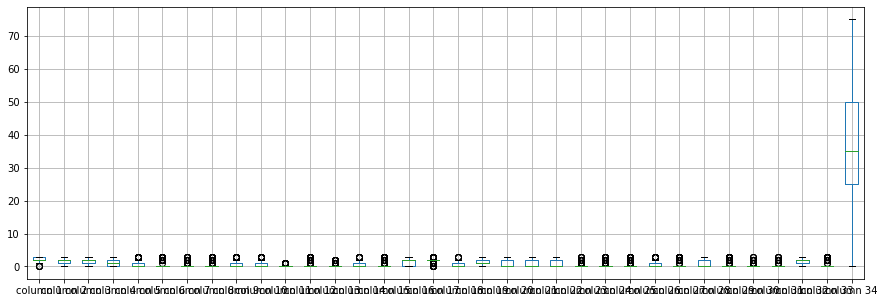

In [6]:
df.boxplot(return_type='axes', figsize=(15,5))

In [7]:
df.mean()

column 1      2.078431
column 2      1.804533
column 3      1.568627
column 4      1.356941
column 5      0.607955
column 6      0.450980
column 7      0.171348
column 8      0.380952
column 9      0.615819
column 10     0.531073
column 11     0.123944
column 12     0.414085
column 13     0.142857
column 14     0.550562
column 15     0.313390
column 16     1.374648
column 17     1.963483
column 18     0.514124
column 19     1.289326
column 20     0.655367
column 21     0.991501
column 22     0.644258
column 23     0.294618
column 24     0.361582
column 25     0.402817
column 26     0.471910
column 27     0.457386
column 28     0.943662
column 29     0.460674
column 30     0.099715
column 31     0.117647
column 32     1.871429
column 33     0.560000
column 34    36.291785
dtype: float64

In [8]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.426030,0.246889,-0.044334,-0.018763,0.027932,-0.115182,-0.035768,0.147435,0.178142,...,-0.017347,0.165015,-0.010589,0.032449,-0.010897,-0.008171,0.008440,0.087844,-0.005740,-0.009742
column 2,0.426030,1.000000,0.340945,-0.081981,-0.014297,-0.073410,-0.083812,-0.085368,0.302338,0.312528,...,-0.086914,0.208110,-0.111167,0.021117,-0.115006,-0.014385,-0.000379,-0.020924,-0.130954,0.007064
column 3,0.246889,0.340945,1.000000,-0.058345,0.233280,0.322662,-0.175753,0.280553,0.298901,0.268269,...,0.290688,0.349641,0.289505,-0.241239,0.270799,-0.087719,-0.130934,0.119133,0.269924,0.135069
column 4,-0.044334,-0.081981,-0.058345,1.000000,0.262886,0.414661,-0.145700,0.362315,-0.299129,-0.158976,...,0.373925,-0.191213,0.370360,-0.003076,0.379983,-0.171857,-0.185223,0.050965,0.394554,0.048340
column 5,-0.018763,-0.014297,0.233280,0.262886,1.000000,0.385683,-0.173014,0.393983,-0.064919,-0.015538,...,0.398926,0.017607,0.376663,0.047810,0.368362,-0.146277,-0.165179,0.123086,0.380605,0.092454
column 6,0.027932,-0.073410,0.322662,0.414661,0.385683,1.000000,-0.137565,0.863105,-0.280247,-0.261043,...,0.884265,-0.122332,0.910005,0.088077,0.894575,-0.096649,-0.112725,0.266582,0.905259,0.095552
column 7,-0.115182,-0.083812,-0.175753,-0.145700,-0.173014,-0.137565,1.000000,-0.134461,0.225033,-0.008471,...,-0.122052,-0.161074,-0.142215,-0.011793,-0.142081,0.770251,0.844641,-0.092764,-0.143662,-0.373215
column 8,-0.035768,-0.085368,0.280553,0.362315,0.393983,0.863105,-0.134461,1.000000,-0.285734,-0.265439,...,0.885031,-0.109487,0.884153,0.126768,0.873500,-0.082976,-0.108757,0.280688,0.894148,0.107583
column 9,0.147435,0.302338,0.298901,-0.299129,-0.064919,-0.280247,0.225033,-0.285734,1.000000,0.668285,...,-0.270293,0.465901,-0.280200,-0.408597,-0.283979,0.229071,0.262078,-0.076930,-0.285646,-0.073706
column 10,0.178142,0.312528,0.268269,-0.158976,-0.015538,-0.261043,-0.008471,-0.265439,0.668285,1.000000,...,-0.260710,0.483798,-0.254326,-0.421707,-0.264442,-0.045835,-0.020319,0.029297,-0.262712,0.035757


In [9]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [34,34+14,34+14+14,34+14+14+14,34+14+14+14+14,34+14+14+14+14+14,34+14+14+14+14+14+14,34+14+14+14+14+14+14+14,34+14+14+14+14+14+14,34+14+14+14+14+14,34+14+14+14+14,34+14+14+14,34+14+14,34+14,34], vae_layer = False, seed = 14)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 75.68476174094461
Epoch: 1 , loss: 75.87585241144353
Epoch: 2 , loss: 75.42260846224698
Epoch: 3 , loss: 75.06768226623535
Epoch: 4 , loss: 75.34311953457919
Epoch: 5 , loss: 75.3823093067516
Epoch: 6 , loss: 74.85085365988992
Epoch: 7 , loss: 73.85286920720881
Epoch: 8 , loss: 71.62917709350586
Epoch: 9 , loss: 69.12057685852051
Epoch: 10 , loss: 68.98130798339844
Epoch: 11 , loss: 68.01001583446156
Epoch: 12 , loss: 67.45883681557395
Epoch: 13 , loss: 67.4918590892445
Epoch: 14 , loss: 66.15599250793457
Epoch: 15 , loss: 66.47032928466797
Epoch: 16 , loss: 66.10131922635165
Epoch: 17 , loss: 65.58971457047896
Epoch: 18 , loss: 65.85240693525834
Epoch: 19 , loss: 65.6367301940918
Epoch: 20 , loss: 65.08600234985352
Epoch: 21 , loss: 65.44672185724431
Epoch: 22 , loss: 64.78010455044833
Epoch: 23 , loss: 64.93565021861683
Epoch: 24 , loss: 64.62628416581587
Epoch: 25 , loss: 64.63381507179953
Epoch: 26

In [11]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [12]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.000000
column 9      3.000000
column 10     2.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     1.000000
column 15     0.000000
column 16     1.000000
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     1.000000
column 32     1.000000
column 33     0.221283
column 34    12.000000
Name: 21, dtype: float64

In [22]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [23]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.199901,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-2.997105,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
354,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
355,0.0,-0.757272,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
356,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [24]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [25]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [26]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(78.61561591502748, 758.0725558942231)

In [27]:
NRMS=numerator/denominator
NRMS


0.10370460624615598

In [28]:
new_df.iloc[66,:]

column 1      2.0
column 2      0.0
column 3      0.0
column 4      3.0
column 5      0.0
column 6      0.0
column 7      0.0
column 8      0.0
column 9      0.0
column 10     0.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     0.0
column 15     2.0
column 16     2.0
column 17     2.0
column 18     0.0
column 19     0.0
column 20     0.0
column 21     3.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     0.0
column 32     2.0
column 33     0.0
column 34    22.0
Name: 66, dtype: float64

In [29]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,1.000000,1.0,1.0,1.0,0.0,0.0,0.199901,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.0,0.0
1,1.0,1.000000,2.0,0.0,0.0,0.0,3.0,0.000000,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.000000,2.0,2.0,0.0,7.0
2,2.0,2.000000,1.0,0.0,0.0,0.0,3.0,0.000000,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.002895,3.0,2.0,0.0,7.0
3,2.0,2.000000,2.0,1.0,0.0,0.0,2.0,0.000000,2.0,2.0,...,0.0,0.0,0.0,2.0,0.0,2.000000,2.0,2.0,0.0,7.0
4,2.0,2.000000,1.0,0.0,0.0,0.0,2.0,0.000000,2.0,0.0,...,0.0,0.0,0.0,3.0,0.0,2.000000,2.0,2.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.000000,0.0,2.0,1.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.000000,0.0,3.0,0.0,70.0
354,2.0,3.000000,2.0,0.0,0.0,0.0,0.0,0.000000,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,70.0
355,2.0,1.242728,2.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.000000,0.0,2.0,0.0,70.0
356,2.0,1.000000,0.0,3.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,70.0


In [30]:
imputations[-1].to_excel("DERM_C_1(imp).xlsx", index=False, header=False)